In [9]:
from pymatgen.ext.matproj import MPRester
import matplotlib.pyplot as plt
from pymatgen.phonon import plotter
import numpy as np

In [11]:
with MPRester("eydjkyvaohvx0D8I") as m:
    ph_structure = m.get_phonon_bandstructure_by_material_id("mp-1394")

## Plots

<Figure size 640x480 with 0 Axes>

<module 'matplotlib.pyplot' from 'C:\\Users\\mariu\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\matplotlib\\pyplot.py'>

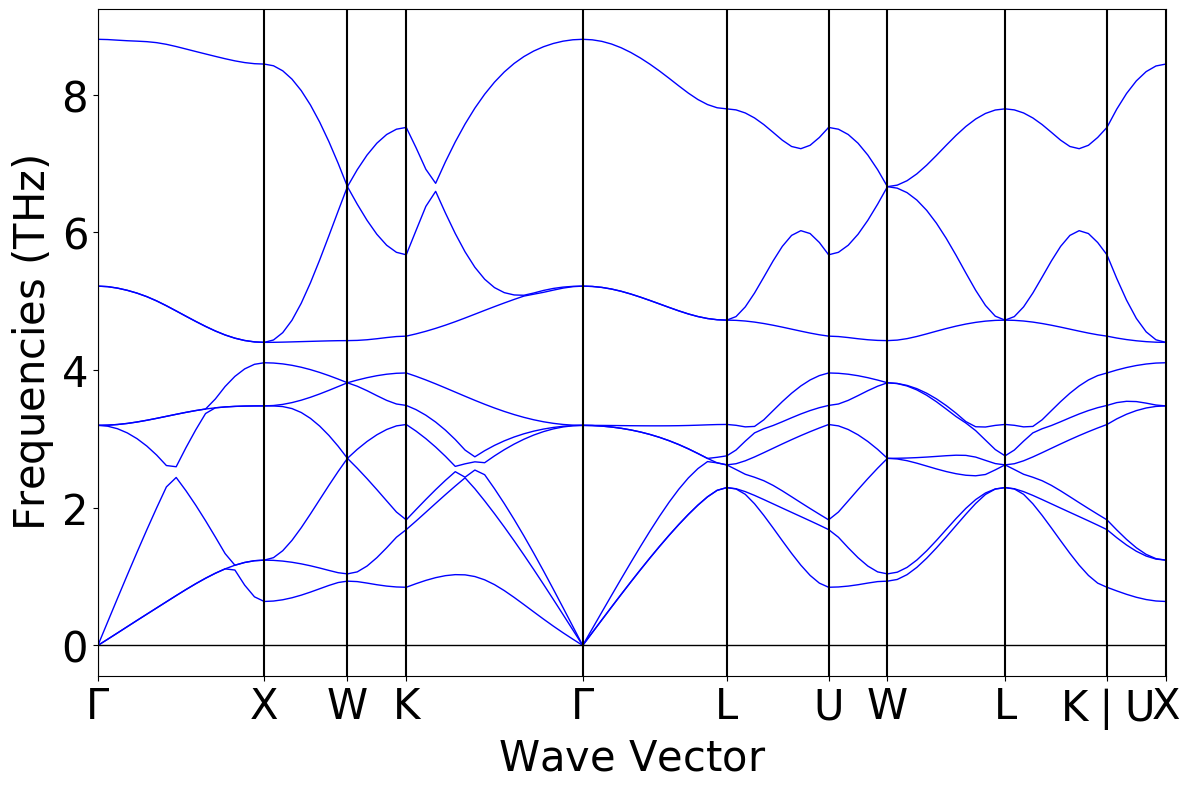

In [8]:
#zone de brillouin
plotter.PhononBSPlotter(ph_structure).plot_brillouin()
#visualisation de la structure de bande des phonons 
plotter.PhononBSPlotter(ph_structure).get_plot()

## Bande de phonons à étudier :

Les bandes que nous devons étudier sont celles dont la fréquence du phonon associée est nulle au centre de la zone de Brillouin. Ici : Γ - X, K - Γ, Γ - L.
Nous pouvons étudier la vitesse du son grâce à la formule : $v_s = \frac{\partial w}{\partial q}$

## Récupération des données

In [5]:
data = plotter.PhononBSPlotter(ph_structure).bs_plot_data()

frequency = data['frequency']
ticks = data['ticks']
distances = data['distances']

## Calculs des vitesses du son des 3 cas

In [6]:
#passage du Angström au mètre :
Ang = 10**10

print ('Cas Γ - X')
cas_1 = 2*np.pi*np.abs((frequency[0][1][1]-frequency[0][1][0])*(10**12))
cas_1 = cas_1/((distances[0][1]-distances[0][0])*Ang)
print('La vitesse du son dans le cas Γ - X vaut {} m/s'.format(cas_1))

print ('Cas K - Γ')
cas_2 = 2*np.pi*np.abs((frequency[3][0][-1]-frequency[3][0][-2])*(10**12))
cas_2 = cas_2/((distances[3][-1]-distances[3][-2])*Ang)
print('La vitesse du son dans le cas K - Γ vaut {} m/s'.format(cas_2))

print ('Cas Γ - L')
cas_3 = 2*np.pi*np.abs((frequency[4][2][1]-frequency[4][2][0])*(10**12))
cas_3 = cas_3/((distances[4][1]-distances[4][0])*Ang)
print('La vitesse du son dans le cas Γ - L vaut {} m/s'.format(cas_3))

Cas Γ - X
La vitesse du son dans le cas Γ - X vaut 1021.7345854437475 m/s
Cas K - Γ
La vitesse du son dans le cas K - Γ vaut 1025.0983628714303 m/s
Cas Γ - L
La vitesse du son dans le cas Γ - L vaut 2813.0227767219403 m/s
